In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
%matplotlib inline


In [2]:
df_friends = pd.read_csv("df_friends.csv")
df_friends.head()

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857


In [3]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.000000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.000000
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [4]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [7]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [8]:
df_friends["Scripts"] = df_friends["Scripts"].astype(str)

In [9]:
df_friends["negative"] = wordcount_df[negative_words].sum(axis=1)


In [10]:
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends["positive"] = wordcount_df[positive_words].sum(axis=1)



In [11]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.500000,0.000000
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,0.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.333333,0.333333
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,1.000000
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.500000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.142857
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [12]:
# df_friends.to_csv("df_friends_sentiment_analysis.csv")

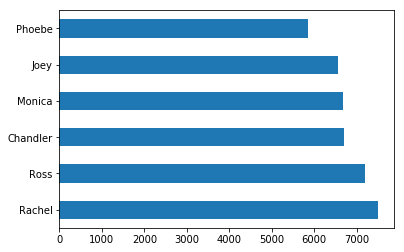

In [13]:
df_friends["Character"].value_counts().head(6).plot(kind = "barh")

In [14]:
url = "http://www.livesinabox.com/friends/1001.shtml"
response = rq.post(url)
doc = BeautifulSoup(response.text, "html.parser")


In [15]:
friends_numbers = [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017]

In [16]:
friends_numbers = pd.DataFrame(friends_numbers)

In [17]:
friends_numbers.columns = ["number"]

In [18]:
friends_numbers["number"] = friends_numbers["number"].astype(str)

In [19]:
friends_numbers

,number
0,1001
1,1002
2,1003
3,1004
4,1005
5,1006
6,1007
7,1008
8,1009
9,1010


In [20]:
urls = "http://www.livesinabox.com/friends/" +friends_numbers["number"] + ".shtml"
urls

0     http://www.livesinabox.com/friends/1001.shtml
1     http://www.livesinabox.com/friends/1002.shtml
2     http://www.livesinabox.com/friends/1003.shtml
3     http://www.livesinabox.com/friends/1004.shtml
4     http://www.livesinabox.com/friends/1005.shtml
5     http://www.livesinabox.com/friends/1006.shtml
6     http://www.livesinabox.com/friends/1007.shtml
7     http://www.livesinabox.com/friends/1008.shtml
8     http://www.livesinabox.com/friends/1009.shtml
9     http://www.livesinabox.com/friends/1010.shtml
10    http://www.livesinabox.com/friends/1011.shtml
11    http://www.livesinabox.com/friends/1012.shtml
12    http://www.livesinabox.com/friends/1013.shtml
13    http://www.livesinabox.com/friends/1014.shtml
14    http://www.livesinabox.com/friends/1015.shtml
15    http://www.livesinabox.com/friends/1016.shtml
16    http://www.livesinabox.com/friends/1017.shtml
Name: number, dtype: object

In [21]:
list_episode_10 = []
list_title_10 = []
for i in urls:
    response = rq.post(i)
    doc = BeautifulSoup(response.text, "html.parser")
    for title in doc.find_all("h3"):
        print(title.text)
        for scripts in doc.find_all("p")[4:-1]:
            print('-----')
            dictionary = {}
            dictionary["title"]  = title.text
            dictionary["scripts"]  = scripts.text
            list_episode_10.append(dictionary)
            print(scripts.text)
    


1001 - The One After Joey And Rachel 
                          Kiss
-----
[Scene: Barbados, Monica and Chandler's Room. They both enter from Ross's
  room. Monica still has her big, frizzy hair.]
-----
Monica: Oh, the way you crushed Mike at ping pong was such
  a turn-on.You wanna...? (plays with her finger on Chandlers chest)
-----
Chandler: You know, I'd love to, but I'm a little tired.
-----
Monica: I'll put a pillowcase over my head.
-----
Chandler: You're on!
-----
(they start to get ready, but then Phoebe enters through the door from Ross's
  room)
-----
Phoebe: Hey!
-----
Monica: What's up?
-----
Phoebe: Well, okay, Mike's taking a shower, which by the
  way there's  no law against. And then we're gonna grab some food, so if you
  want...
-----
(there's a door slamming in Ross's room, and some indistinct murmuring)
-----
Ross: ... finally...
-----
Phoebe: Is that Ross?
-----
Monica: Yeah, you can hear everything through these stupid
  walls.
-----
Phoebe: Sounds like he's with

1005 - The One Where Rachel's Sister 
                            Babysits
-----
[Scene: Central Perk]
-----
 
-----
Rachel: 
                            You know, I'm thinking about letting Emma have her 
                            first cookie.
-----
Joey: Her first cookie? 
                            She has cookies all the time!
-----
Rachel: I've never 
                            given her a cookie. Have you?
-----
Joey: No! No... and, 
                            for the record, I've also never given her a frosting 
                            from a can!
-----
Monica: Hey Rach, the 
                            adoption agency needs letters of recommendation and 
                            we were wondering if you would write one for us.
-----
Rachel: Of course, 
                            I'd be honored!
-----
Chandler: Thanks!
-----
Monica: Thank you!
-----
(Joey looks at them, disappointed about 
                            their decision)
-----
Joey: U-U-Um, I think 
   

1006 - The One With Ross's Grant
-----
Written by: Sebastian Jones
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Cof fee Mug, Ele onora, Seba stiano 
                          & Vaness a 
                          Final check by Kim 
-----
--------------------------------------------------------------------------------
-----
Scene: Central Perk, everyone except Phoebe is there]
                          Phoebe: (she enters) Hey...
-----
All: Hey!
-----
Rachel: Hi!
-----
Ross: Pheebs, what's wrong?
-----
Phoebe: Oh, I'm just so exhausted from dragging around 
                          this... (she shows her ring)HUGE engagement ring!
-----
All: OH!
-----
Rachel: My God!
-----
Joey: Hey!
-----
Rachel: Congratulations! Wow!!
-----
Ross: So, did he get on one knee, did he have a speech 
                          prepared, or (in a tender way) did he cry? (the guys 
                          look at him) Yeah, big surprise,

1007 - The One With The Home Study
-----
Written by: Mark Kunerth
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk]
-----
(Joey and Ross enter. Phoebe and Mike are sitting on 
                          the couch, reading a magazine.)
-----
Ross: Hey you guys!
-----
Phoebe: Hey!
-----
Ross: Hey, what are you doing?
-----
Mike: Oh, figuring out our wedding plans.
-----
Chandler: That's funny, we were doing the same thing!
-----
Ross: Yeah!
-----
Phoebe: It's really crazy! The hall, the dress, the 
                          food... I-I had no idea how expensive this stuff was!
-----
Chandler: Yeah it is really pricey. I mean, I freaked 
                          when I first heard the numbers.
-----
Phoebe: So what did you two do about it?
-----
Chandler: It 

1008 - The One With The Late Thanksgiving
-----
Written by: Shana Goldberg-Meehan 
                          Produced by: Robert Carlock & Wendy Knoller 
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk. Monica and Chandler enter, the 
                          others are sitting on the couch.]
-----
Monica: Hey guys!
-----
Rachel: Hi! 
-----
Phoebe: Hey!
-----
Monica: We need to talk to you about something.
-----
Chandler: Yeah. We don't feel like we can host Thanksgiving 
                          this year.
-----
All: What?
-----
Phoebe: Hey!
-----
Ross: Are you kidding?
-----
Chandler: Well, it's just with uhm, work and the stress 
                          of adoption, we just don't feel like we have the energy. 
                          Plus, we don't think it's fair that every year the burden 
                         

1009 - The One With the Birth Mother
-----
Written by: Scott Silveri
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk. Everyone's sitting on the couch.Monica 
                          and Chandler enter]
-----
Chandler: Hi!
-----
Ross: Hey!
-----
Monica: Hey!
-----
Chandler: We're just here to say goodbye, we're off 
                          to Ohio.
-----
Phoebe: Oh, right! Your adoption interview!
-----
Monica: Yep, we're gonna meet the lady who could be 
                          carrying our baby.
-----
Joey: I can't believe it. When you guys come back, 
                          you're gonna have a baby! That is so weird!
-----
Chandler: And so incorrect!
-----
Monica: She's only a couple of months pregnant. She 
                          liked our 

1010 - The One Where Chandler Gets 
                          Caught
-----
Written by: Doty Abrams
                          Produced by: Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Flashback clips transcribed by: Guineapig, Dan Silverstein, 
                          Ruth Curran, Eric Aasen and Mindy Mattingly Phillips, 
                          and compiled by Eleonora.
                          Final check by Kim
-----

                          [Scene: Central Perk. Everybody's sitting on the couch 
                          and Monica is eating a chunk of cake.]
                          Monica: (really excited) Mmh... this cake is amazing!
-----
Rachel: My God, get a room!
-----
Monica: I would get a room with this cake. I think 
                          I could show this cake a good time!
-----
Phoebe: If you had to, what would you give up, food 
                        

1011 - The One Where the Stripper Cries
-----
Written by: Marta Kauffman & David Crane
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Everyone's sitting on the couch. 
                          Monica and Joey enter.]
                          Joey: Hey guys!
-----
Monica: Hey, let me tell them!
-----
Joey: Sure.
-----
Monica: Joey is gonna be a celebrity guest on a game 
                          show!
-----
Phoebe: Great!
-----
Ross: Really? Which one?
-----
Monica: (stopping Joey from answering) Ohh! Fish, seaweed, 
                          a sunken ship.
-----
Ross: Things you find in the ocean, (to Joey) You're 
                          gonna be on "Pyramid"!!
--

1012 - The One With Phoebe's Wedding
-----
Written by: Robert Carlock & Dana Klein 
                          Produced by: Robert Carlock & Wendy Knoller 
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Joey's sitting on the couch and 
                          Phoebe enters.]
                          Phoebe: Oh, hey Joey.
-----
Joey: Uh, hey.
-----
Phoebe: Listen, I need to ask you something. Ok, you 
                          know how my step dad's in prison.
-----
Joey: (afraid) Yeah.
-----
Phoebe: Yeah. Well, uhm... listen he was supposed to 
                          get a weekend furlough, so he'd come to the wedding 
                          tomorrow, but he just called and... uhm... well, apparently 
                          stabbing Iceman in the exercise yard just couldn

1013 - The One Where Joey Speaks French
-----
Written by: Sherry Bilding-Graham & Ellen Plummer 
                          
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Everyone's sitting on the couch 
                          and Phoebe enters.]
                          Phoebe: Hi
-----
All: Hey! Hi!
-----
Rachel: How was the honeymoon?
-----
Phoebe; Oh, incredible! Oh! Champagne, candle-lit dinners, 
                          moonlight walks on the beach, it was sooo ro-man-tic!
-----
Rachel: Oh!
-----
Chandler: So, where's Mike?
-----
Phoebe: Oh, he's at the doctor, he didn't poop the 
                          whole time we were there!
-----
Joey: Well anyway, I'm glad you're back, I really need 
         

1014 - The One With Princess Consuela
-----
Teleplay by: Tracy Reilly 
                          Story by: Robert Carlock 
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Chandler and Monica's apartment. They are having 
                          a diner party with Phoebe and Mike.] 
-----
Mike: (raising his glass) Thank you guys for having 
                          us over.
-----
Phoebe: Oh! Yeah, this is fun, couples night.
-----
Chandler: Yeah, I don't know why we hang out with married 
                          couples more often.
-----
Monica: Well, because every time we do, you make jokes 
                          about swinging and scare them away.
-----
Chandler: You mean that Portuguese couple? Yeah, like 
                          you wouldn't have done it. 

1015 - The One Where Estelle Dies 
-----
[Flashback scene from last week, Monica and Chandler's kitchen, 
  Rachel, Ross, Monica and Chandler are there.]
-----
Jennifer: Previously on Friends...
-----
Chandler: How did the job stuff go?
-----
Rachel: He offered me one.
-----
Ross: (gasps) You know what? This calls for a bottle of Israels finest.
-----
Rachel: The job is in Paris. (we see Ross stare in disbelief)
-----

FADE OUT
-----
Rachel: Oh, God! Please, somebody  say something.
-----
Ross: So if you take this job you'll be moving to Paris?
-----
Chandler: Or facing a bitch of a commute.
-----
Rachel: I know, it's huge, and it's scary, and it's... really far, far away 
  from you guys, but this is such an incredible opportunity for me. And I've already 
  talked to them about our situation with Emma, and they said they'll do whatever 
  we need to make us feel comfortable.
-----
Ross: Okay.
-----
Rachel: I mean, I'll fly back and forth, they'll fly you out... 
  Anything we want.
-

Friends 
                          1016 - The One With Rachel's Going Away Party 
-----
[Scene: Joey's place. Rachel and Joey 
                          are talking]
-----
Joey: All right, all right, all right, 
                          let's play one more time, ok? And remember, if I win 
                          you do not move to Paris.
-----
Rachel: Ok! Can't believe I'm risking 
                          this again, but you're on! All right Joe, you remember 
                          the rules! Heads I win, tails you lose.
-----
Joey: Just flip!
-----
Rachel (she flips the coin): Ha, tails!
-----
Joey: Damnit!
-----
(Chandler and Monica enter the room)
-----
Chandler: Hey!
-----
Joey: Hey!
-----
Chandler: So we thought we'd throw 
                          you little going away party around seven.
-----
Rachel: Oh, that sounds good!
-----
Monica: Hey, Rach, you're leaving 
                          tomorrow, shouldn't you be packing?
-----
Rachel: It's all done!
-----
Monica: O

                          antacids.
-----
Monica: She doesn't have a stomach 
                          ache, she's in labor.
-----
Chandler: Oh my God!
-----
Phoebe: Yeah, you got to get to the 
                          hospital.
-----
Monica: All right, Chandler get the 
                          coats. Erica let's go. Phoebe and Joey, keep packing! 
                          Oh my God we're gonna have a baby. All right. We're 
                          gonna have a baby! OH MY GOD, WE'RE GONNA HAVE A BABY! 
                          Oh God, oh God, I got to sit down, I got to sit down. 
                          Ooh! (she's hyperventilating)
-----
Chandler: Honey, it's gonna be okay.
-----
Erica: You can do this. Just breathe.
-----
Monica: Okay, okay... Okay, I feel 
                          a little better.
-----
Erica: (in pain) Ooh! Are you sure?
-----
Monica: Oh... Yes, I'm sure. Oh honey, 
                          let's go. Okay bye everyone.
-----
(there's a lot of support

  keys. Then the other four pick out their keys and leave them as well.)
-----
Phoebe: So, I guess this is it.
-----
Joey: Yeah. I guess so.
-----
Monica: (crying) This is harder than I thought it would be.
-----
Chandler: Oh, it's gonna be okay.
-----
(Chandler hugs her. Monica hugs Ross and Rachel as Chandler gets the stroller with the 
  twins.)
-----
Rachel: (crying) Do you guys have to go to the new house right away, 
  or do you have some time?
-----
Monica: We got some time.
-----
Rachel: Okay, should we get some coffee?
-----
Chandler: Sure. Where?
-----
(They all leave the apartment. Joey helps Chandler with the stroller 
  in the hallway, while Monica and Rachel have their arms around each 
  other. Everybody walks downstairs to Central Perk. The camera goes 
  inside the apartment again, and it pans around. We see the keys on the 
  counter, and the final shot is of the frame around the peephole. The 
  screen fades to black.)


In [22]:
Season_10 = pd.DataFrame(list_episode_10)

In [23]:
Season_10.head()

,scripts,title
0,"[Scene: Barbados, Monica and Chandler's Room. ...",1001 - The One After Joey And Rachel \n ...
1,"Monica: Oh, the way you crushed Mike at ping p...",1001 - The One After Joey And Rachel \n ...
2,"Chandler: You know, I'd love to, but I'm a lit...",1001 - The One After Joey And Rachel \n ...
3,Monica: I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel \n ...
4,Chandler: You're on!,1001 - The One After Joey And Rachel \n ...


In [24]:
Season_10["Characters"] = Season_10["scripts"].str.split(":", 1, expand = True)[0] 
Season_10["scripts"] = Season_10["scripts"].str.split(":", 1, expand = True)[1]


In [26]:
Season_10.dropna(inplace = True)

In [27]:
Season_10 = Season_10[Season_10["Characters"] != "[Scene"]

In [28]:
Season_10 = Season_10[Season_10["Characters"] != "Written by"]

In [29]:
Season_10["scripts"] = Season_10["scripts"].str.replace("\n", " ")

In [30]:
Season_10["title"] = Season_10["title"].str.replace("\n", " ")

In [31]:
Season_10

,scripts,title,Characters
1,"Oh, the way you crushed Mike at ping pong was...",1001 - The One After Joey And Rachel ...,Monica
2,"You know, I'd love to, but I'm a little tired.",1001 - The One After Joey And Rachel ...,Chandler
3,I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel ...,Monica
4,You're on!,1001 - The One After Joey And Rachel ...,Chandler
6,Hey!,1001 - The One After Joey And Rachel ...,Phoebe
7,What's up?,1001 - The One After Joey And Rachel ...,Monica
8,"Well, okay, Mike's taking a shower, which by ...",1001 - The One After Joey And Rachel ...,Phoebe
10,... finally...,1001 - The One After Joey And Rachel ...,Ross
11,Is that Ross?,1001 - The One After Joey And Rachel ...,Phoebe
12,"Yeah, you can hear everything through these s...",1001 - The One After Joey And Rachel ...,Monica


In [32]:
df_friends.head()

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.500000,0.000000
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,0.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.333333,0.333333
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,1.000000


In [33]:
Season_10.head()

,scripts,title,Characters
1,"Oh, the way you crushed Mike at ping pong was...",1001 - The One After Joey And Rachel ...,Monica
2,"You know, I'd love to, but I'm a little tired.",1001 - The One After Joey And Rachel ...,Chandler
3,I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel ...,Monica
4,You're on!,1001 - The One After Joey And Rachel ...,Chandler
6,Hey!,1001 - The One After Joey And Rachel ...,Phoebe


In [35]:
df_friends = df_friends.drop('Unnamed: 0', 1)


In [40]:
df_friends = df_friends.drop('negative', 1)
df_friends = df_friends.drop('positive', 1)


In [37]:
Season_10.columns = ["Scripts", "title", "Character"]

In [42]:
df_friends_merged = df_friends.append(Season_10, ignore_index=True)

In [43]:
df_friends_merged.head()

,Character,Scripts,title
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends_merged['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [46]:
df_friends_merged["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends_merged["positive"] = wordcount_df[positive_words].sum(axis=1)



In [47]:
df_friends_merged.head()

,Character,Scripts,title,negative,positive
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...,0.500000,0.000000
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...,0.333333,0.333333
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...,0.000000,1.000000


In [54]:
df_friends_merged

,Character,Scripts,title,negative,positive
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...,0.500000,0.000000
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...,0.333333,0.333333
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...,0.000000,1.000000
5,Monica,"Okay, everybody relax. This is not even a dat...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.500000
6,Chandler,Sounds like a date to me.,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
7,Chandler,"Alright, so I'm back in high school, I'm stan...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.142857
8,All,"Oh, yeah. Had that dream.",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
9,Chandler,"Then I look down, and I realize there's a pho...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000


In [51]:
df_friends_merged["Character"].value_counts().head(6)

Rachel      8197
Ross        7965
Chandler    7318
Monica      7300
Joey        7181
Phoebe      6459
Name: Character, dtype: int64

In [52]:
df_friends_merged.to_csv("Friends_complete.csv")